# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# visualize data

[9]


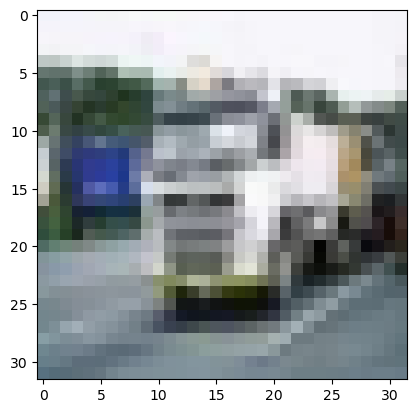

In [9]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])
plt.show()

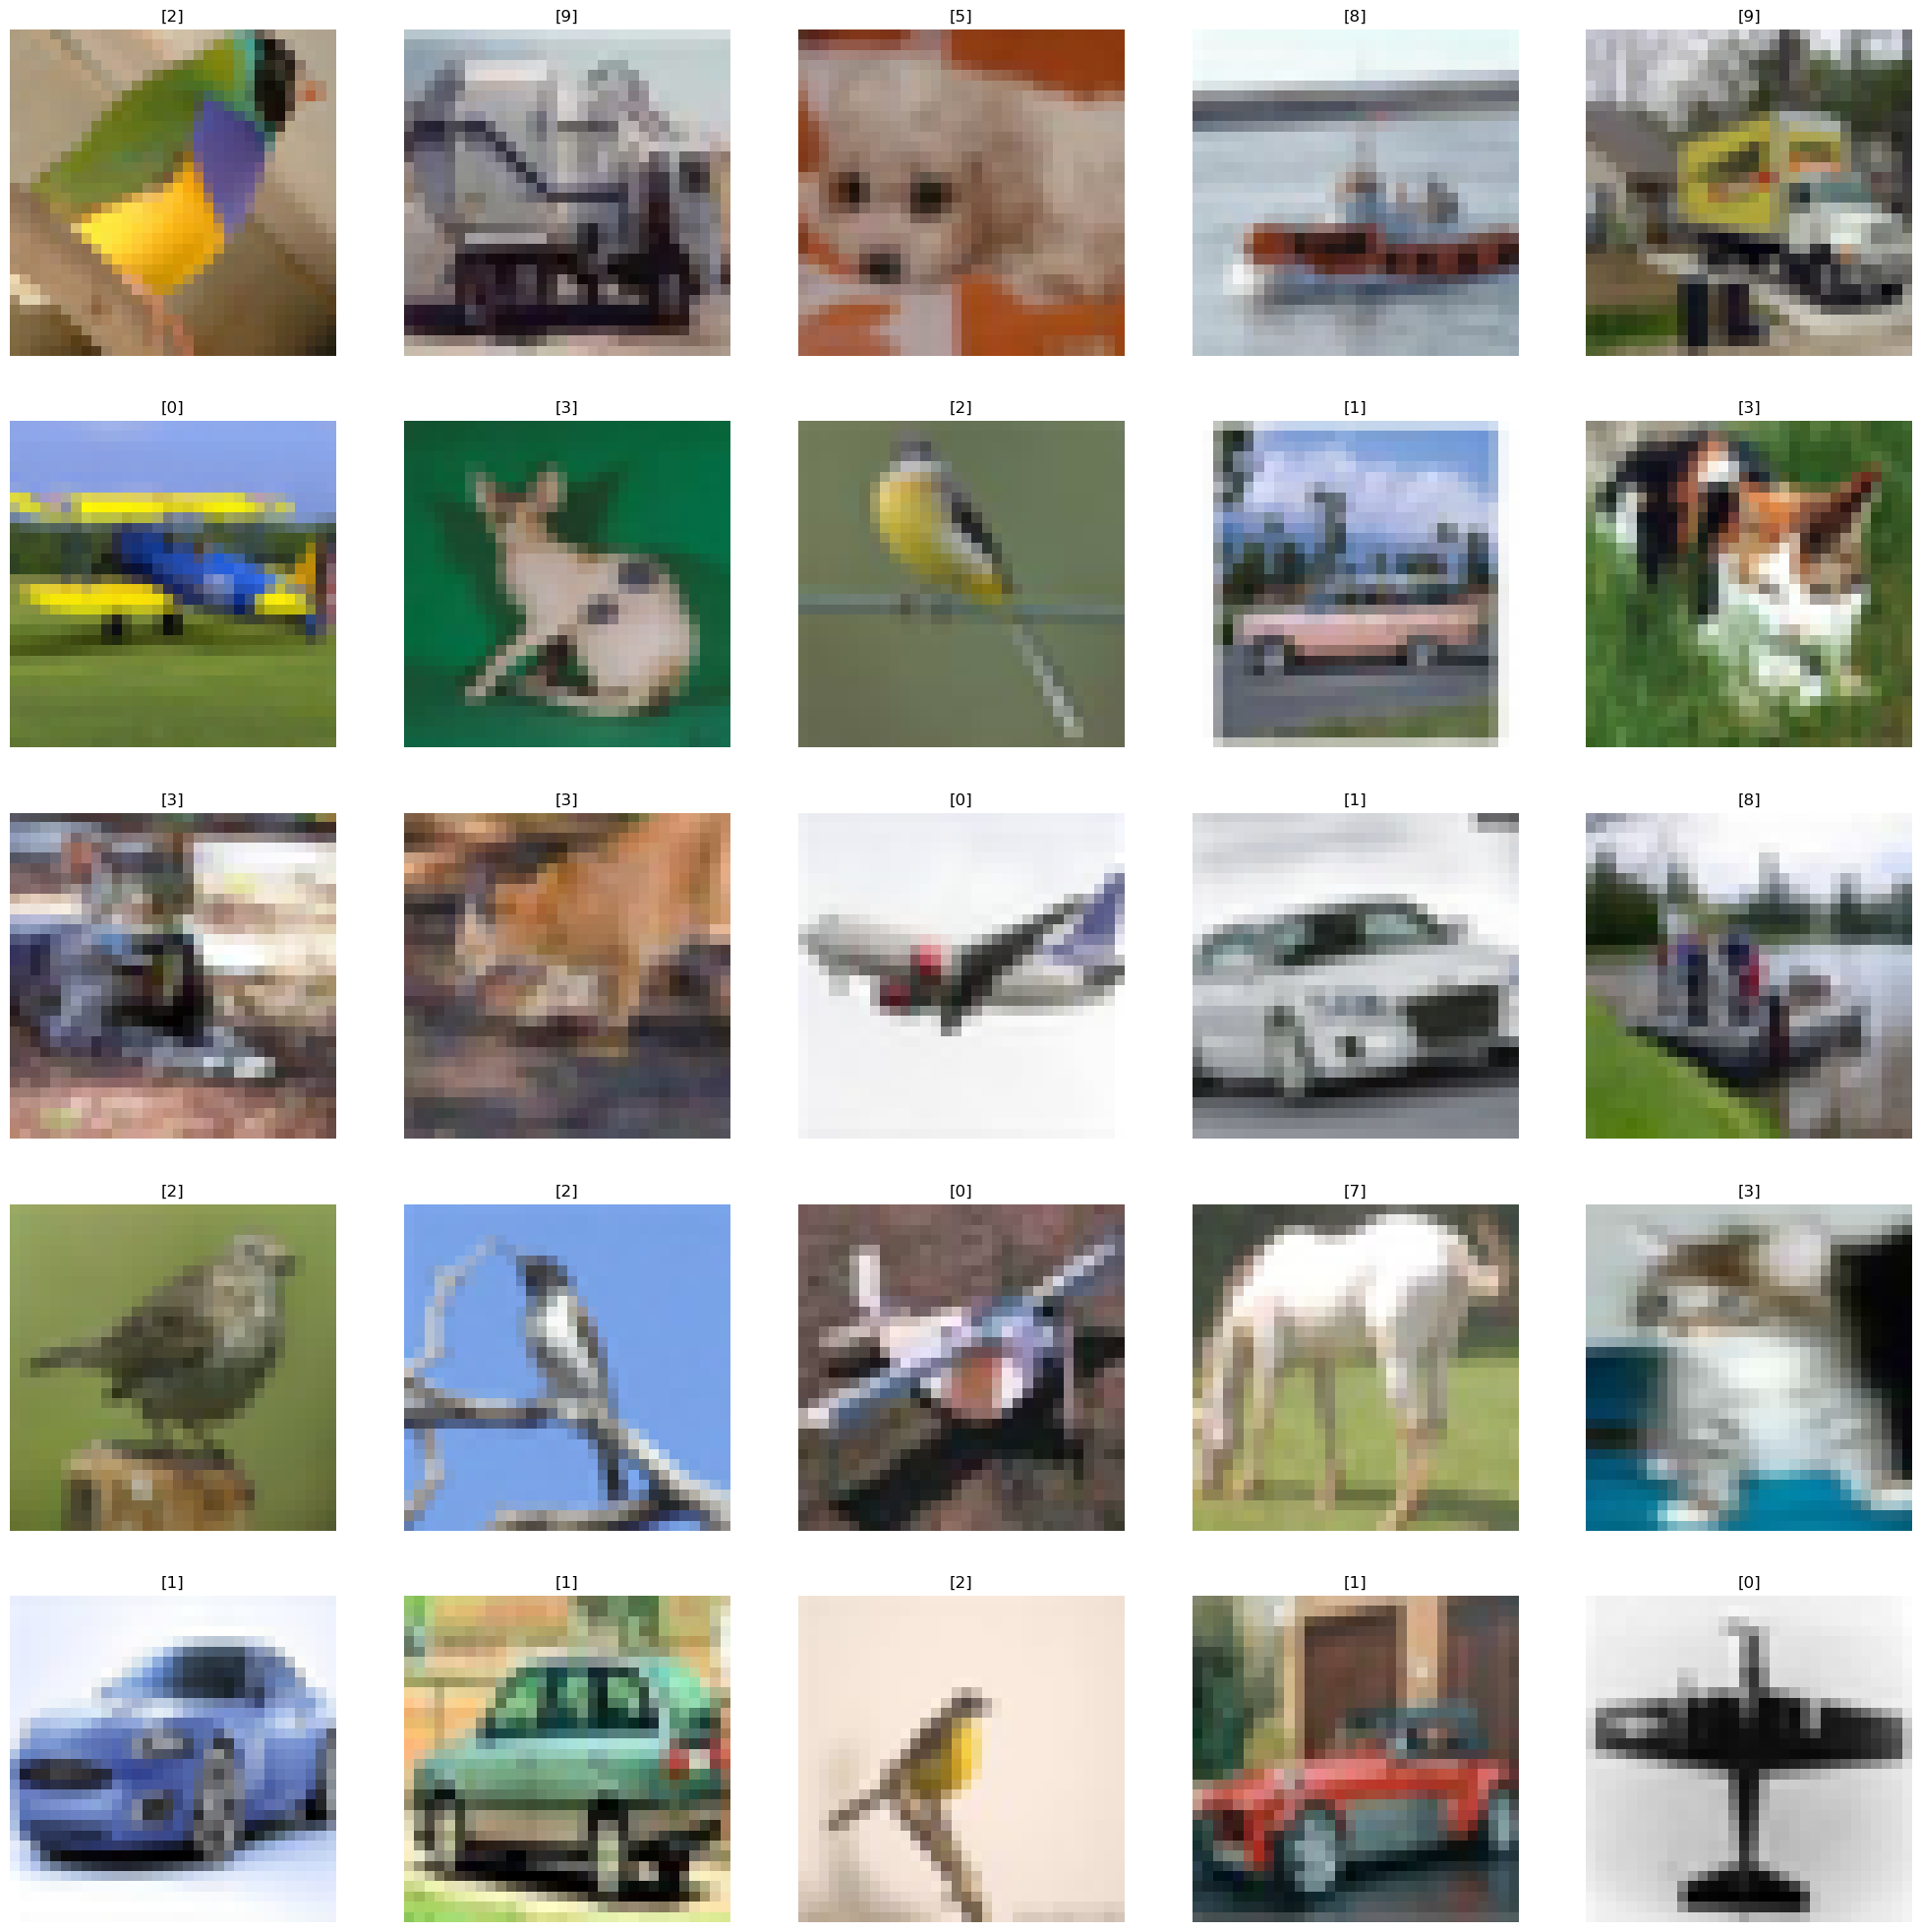

In [10]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    idx = np.random.randint(0, n_training)
    axes[i].imshow(X_train[idx])
    axes[i].set_title(y_train[idx])
    axes[i].axis('off')

# data preparation

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
import keras
number_cat = 10
y_train = keras.utils.to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [15]:
y_train.shape

(50000, 10)

In [16]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test.shape

(10000, 10)

In [18]:
X_train /= 255 # as color ranges from 0 to 255
X_test /= 255

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

# train model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (Input_shape)),
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

C:\Users\ramch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from keras.optimizers import RMSprop
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics=['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.3189 - loss: 1.8421
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5644 - loss: 1.2258


In [26]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6461 - loss: 1.0124
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6909 - loss: 0.9024
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7042 - loss: 0.8592
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7178 - loss: 0.8229
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7286 - loss: 0.8054


# model evaluation

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(evaluation[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7304 - loss: 0.7964
0.7315999865531921


In [29]:
predictions = cnn_model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [30]:
y_test = y_test.argmax(1) # float to int

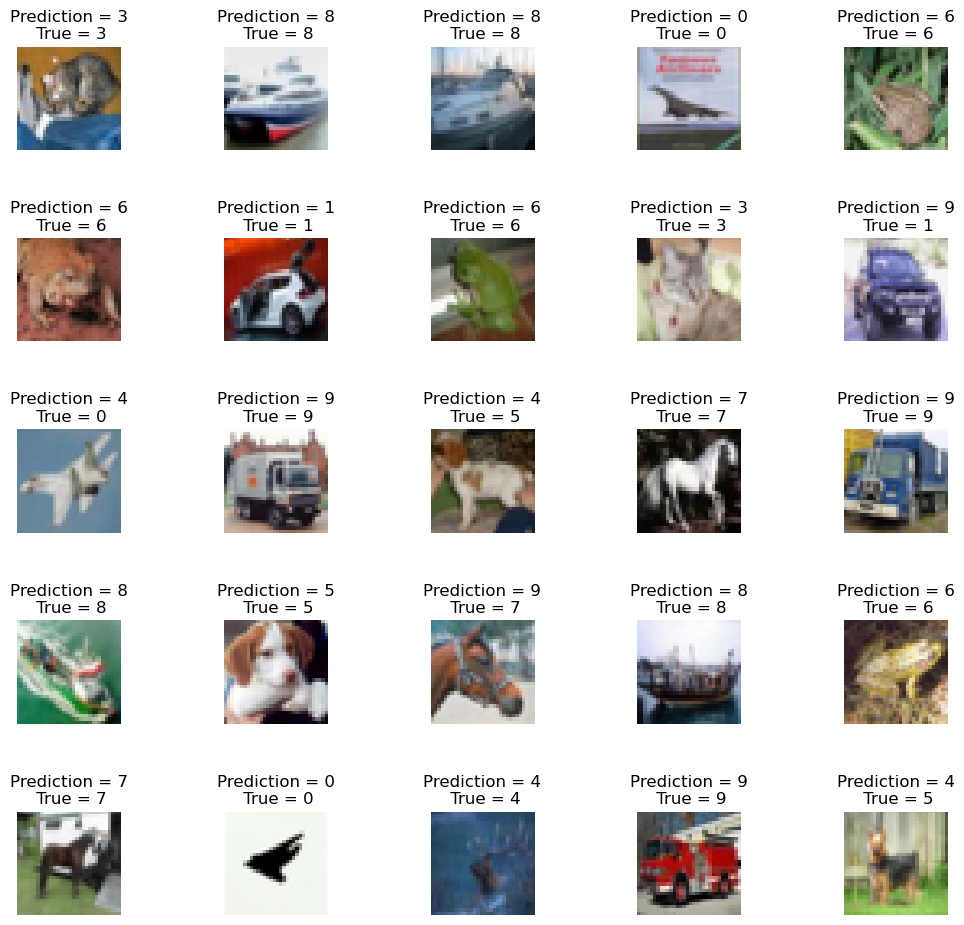

In [31]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)

<Axes: >

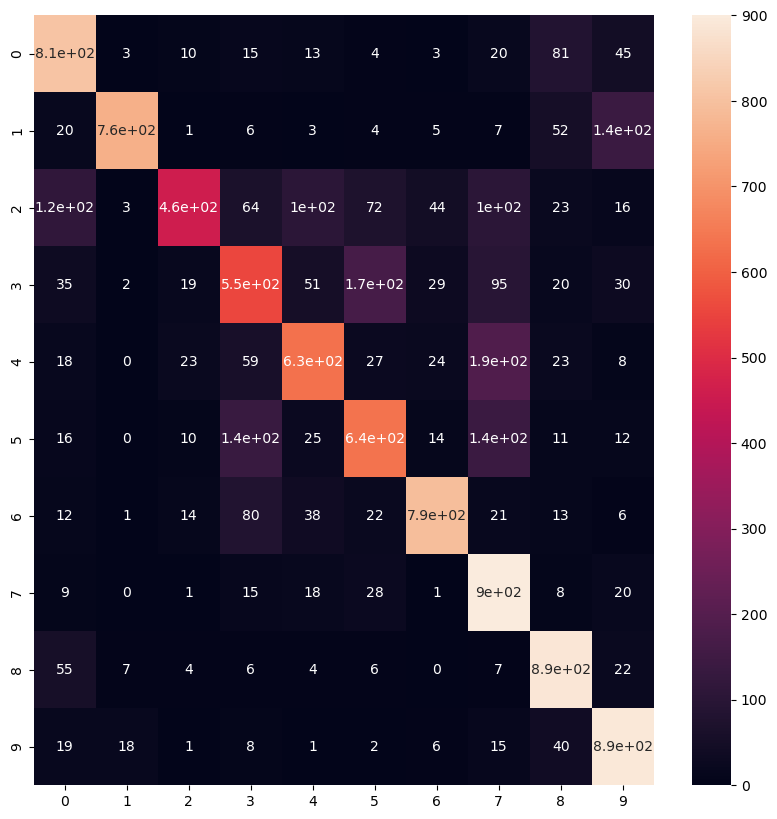

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# save model

In [35]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

In [36]:
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_model.keras')
cnn_model.save(model_path)

# data augmentation

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [40]:
X_train.shape

(50000, 32, 32, 3)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
)

In [42]:
datagen.fit(X_train)

In [45]:
from tensorflow.keras.utils import to_categorical
num_classes = 10  
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

In [51]:
cnn_model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32), epochs=5)

Epoch 1/5
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.2257 - loss: 419.9253   

C:\Users\ramch\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.1088 - loss: 7.9613
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.1004 - loss: 2.3082
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.0987 - loss: 2.3027
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.0982 - loss: 2.3028
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.0976 - loss: 2.3027


In [57]:
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

score = cnn_model.evaluate(X_test, y_test_one_hot)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1027 - loss: 2.3025
0.10000000149011612


In [59]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_Augmented_model.keras')
cnn_model.save(model_path)